

**Title: Email Spam Detection Using Machine Learning**

* To design and implement an efficient email spam detection system using machine learning techniques, specifically the Naive Bayes algorithm. The system classifies emails as "spam" or "non-spam" (ham) based on textual content, enabling automated filtering of unwanted emails.











In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Emails.csv to Emails.csv


In [3]:
#read dataset

data = pd.read_csv('Emails.csv')

In [4]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [6]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [51]:
# Rename columns for easier access
data.rename(columns={'label': 'result', 'message': 'emails'}, inplace=True)
data.columns
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


 **Data Preprocessing**

 Clean the data & prepare it for analysis

In [60]:
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [61]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
#check for missing values
data.isnull().sum()

#drop rows with missing values if any
data.dropna(inplace=True)

In [67]:
# Convert all text to lowercase and remove punctuation
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['text'] = data['text'].apply(clean_text)



In [69]:
# Tokenize, remove stopwords, and apply stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [72]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [74]:
# Assuming 'data' is our DataFrame
data['processed_text'] = data['text'].apply(preprocess_text)

# Display the preprocessed data
data.head()

,text,spam,processed_text
0,subject naturally irresistible your corporate ...,1,subject natur irresist corpor ident lt realli ...
1,subject the stock trading gunslinger fanny is...,1,subject stock trade gunsling fanni merril muzo...
2,subject unbelievable new homes made easy im w...,1,subject unbeliev new home made easi im want sh...
3,subject 4 color printing special request addi...,1,subject 4 color print special request addit in...
4,subject do not have money get software cds fr...,1,subject money get softwar cd softwar compat gr...


**Exploratory Data Analysis (EDA)**

Analyze the dataset's spam and non-spam distribution, email length, and keywords.

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [89]:
#distribution of spam and non-spam emails
data['spam'].value_counts()

,count
spam,
0,4360
1,1368


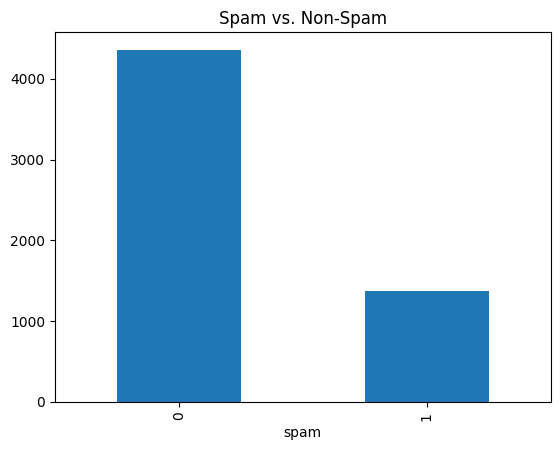

In [90]:
data['spam'].value_counts().plot(kind='bar', title='Spam vs. Non-Spam')
plt.show()

In [95]:
# Average length of emails
data['email_length'] = data['text'].apply(len)
data.groupby('spam')['email_length'].mean()

,email_length
spam,
0,1540.220183
1,1256.577485


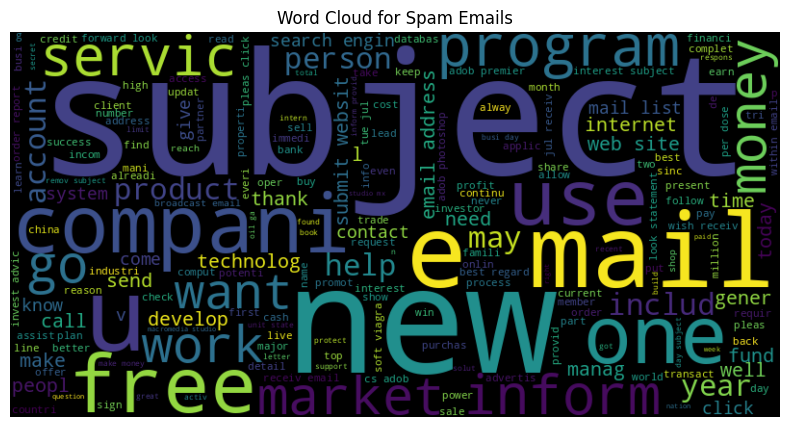

In [98]:
# Word Cloud for spam emails
spam_words = ' '.join(data[data['spam'] == 1]['processed_text'].astype(str))

# Check if spam_words is empty
if len(spam_words.split()) > 0:
    spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
else:
    print("No words found for spam emails to create a word cloud.")

# Display the word cloud for spam emails
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


**Feature Engineering**

Convert text into numerical format using TfidfVectorizer

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

#convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features = 3000)
X = vectorizer.fit_transform(data['processed_text']).toarray()

#assign labels
y = data['spam'].map({'spam' :1, 'ham' : 0})


In [136]:
y = y.fillna(-1)

**Model Selection** -
Split the dataset into training and testing sets.

In [137]:
from sklearn.model_selection import train_test_split

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 4582
Testing set size: 1146


**Model Training** -
Description: Train a Naive Bayes model using the training data.

In [138]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

**Model Evaluation** -
 Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Calculate evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1146

    accuracy                           1.00      1146
   macro avg       1.00      1.00      1.00      1146
weighted avg       1.00      1.00      1.00      1146



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Save the trained model for future use.

In [145]:
import pickle

# Save the model
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(nb_model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


Future Work

Enhance the model by trying advanced algorithms, adding new features, or fine-tuning hyperparameters.